In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("fraud.csv")

In [3]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [7]:
data["type"].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

In [9]:
type = data["type"].value_counts()
transaction = type.index
quantity = type.values

In [11]:
import plotly.express as px

In [18]:
fig1 = px.pie(data,
             values = quantity,
             names = transaction, hole = 0.5,
             title = "Distribution of Transaction Type")

In [19]:
fig1.show()

In [20]:
fig2 = px.bar(data, x= transaction, y = quantity,labels={'x': 'Transaction Type', 'y': 'Count'}, title='Transaction Type Distribution')

In [21]:
fig2.show()

In [22]:
correlation = data.corr()

C:\Users\MANISH JAISWAL\AppData\Local\Temp\ipykernel_16932\307749493.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



In [25]:
correlation["isFraud"].sort_values(ascending = False)

isFraud           1.000000
amount            0.076688
isFlaggedFraud    0.044109
step              0.031578
oldbalanceOrg     0.010154
newbalanceDest    0.000535
oldbalanceDest   -0.005885
newbalanceOrig   -0.008148
Name: isFraud, dtype: float64

In [26]:
import seaborn as sb

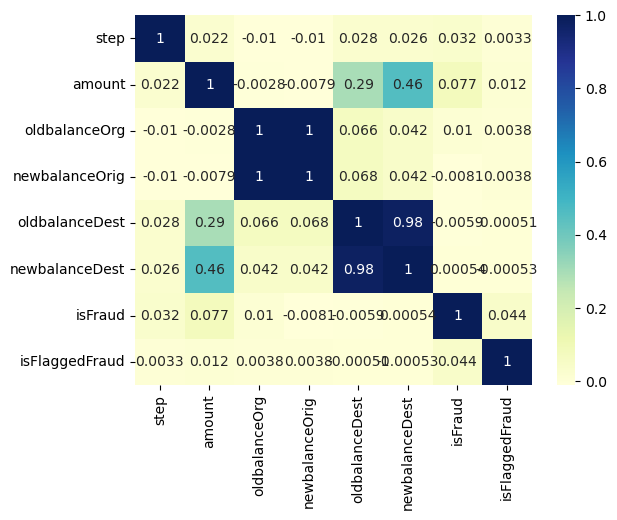

In [27]:
corr_matrix = sb.heatmap(correlation, cmap="YlGnBu", annot=True)

In [28]:
data["type"] = data["type"].map({
    "CASH_OUT": 1, 
    "PAYMENT": 2,                              
    "CASH_IN": 3,
    "TRANSFER": 4,
    "DEBIT": 5
})

data["isFraud"] = data["isFraud"].map({
    0: "No Fraud", 
    1: "Fraud"
})


In [29]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,2,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,No Fraud,0
1,1,2,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,No Fraud,0
2,1,4,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,Fraud,0
3,1,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,Fraud,0
4,1,2,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,No Fraud,0


In [30]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [32]:
import numpy as np

In [33]:
x = np.array(data[["type", "amount", "oldbalanceOrg", "newbalanceOrig"]])

y = np.array(data[["isFraud"]])

In [34]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.30, random_state=0) 

In [35]:
tree = DecisionTreeClassifier()

In [36]:
tree.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [37]:
tree.score(xtest,ytest)

0.9996751862178369

In [40]:
features = np.array([[4,125600,125600,0.0]])
print(tree.predict(features))

['Fraud']
